# Data Cleaning
Data Cleaning is usually a curcial step **before** we can make any use of the data. It helps making our model we create later more robust, in some cases we aren't even able to build a model with uncleaned data. Since this workshop focuses mainly on ML-methods, we will make the Data Cleaning-part very brief, thus you will only see the most basic cleaning techniques here. Let's get started!

## The Data
Before we can start cleaning anything, we need the corersponding data. We will consider two datasets in this workshop, one to perform regression and one to perform classification. Since most tutorials on ML keep using toy-datasets like the Iris-Dataset and such demonstrations don't give you a good feeling of what Data Science is, we won't stick to these toy-datasets. Instead we will use more realistic ones to give you a better feeling of the challenges you might face during using ML/DS-techniques for your purposes. Our regression-dataset will contain climate data of New York State and our classification-dataset will contain data about anonymized credit-related information of bank-customers, this data is then used to assign a credit score to each customer. Don't be confused by the word "score" here, it refers to a discrete value, thus performing classification is a valid approach.

## Loading the Data
Finally, it's time to get started! We now will import all libraries we will use in this notebook and load the data.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import IsolationForest

### Climate-Data
We start with the climate data. Our goal here is to predict the daily maximum dry-bulb temperature based on the other features. First we load it as a pandas-dataframe, then we use the `describe`-function provided by pandas to give us an overview over the data. Based on the information gathered there, we proceed by going through our preprocessing-checklist:
1. remove unneccessary columns
2. remove duplicates
3. handle missing values

In [2]:
climate_data = pd.read_csv('../data/climate-data/data.csv', index_col=0)
climate_data

,DATE,REPORT_TYPE,SOURCE,BackupElements,BackupElevation,BackupEquipment,BackupLatitude,BackupLongitude,BackupName,DailyAverageDewPointTemperature,...,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset,WindEquipmentChangeDate
STATION,,,,,,,,,,,,,,,,,,,,,
72518014735,2015-01-01T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",7.0,...,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0,2006-09-08
72518014735,2015-01-02T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",17.0,...,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0,2006-09-08
72518014735,2015-01-03T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",18.0,...,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0,2006-09-08
72518014735,2015-01-04T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",35.0,...,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0,2006-09-08
72518014735,2015-01-05T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6918,-73.83109,"NWS ALBANY, NY",11.0,...,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0,2006-09-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72518014735,2022-05-27T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",63.0,...,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0,2006-09-08
72518014735,2022-05-28T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",59.0,...,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0,2006-09-08
72518014735,2022-05-29T23:59:00,SOD,6,PRECIP,260,PLASTIC,42.6812,-73.81650,"NWS ALBANY, NY",50.0,...,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0,2006-09-08


In [3]:
climate_data.describe()

,SOURCE,BackupElevation,BackupLatitude,BackupLongitude,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,...,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
count,2668.0,2668.0,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,...,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,6.0,260.0,42.689750,-73.828268,38.217766,50.107571,66.085082,30.031945,29.709059,44.680285,...,2.155660,17.040480,59.418666,40.299100,222.387556,25.513493,223.924288,19.023238,563.145427,1783.491004
std,0.0,0.0,0.004187,0.005764,19.116250,18.747310,13.401359,0.223771,0.220846,17.039933,...,8.202932,16.134205,20.003706,18.122395,90.828564,9.436276,90.846564,6.942113,108.536855,111.230222
min,6.0,260.0,42.681200,-73.831090,-19.000000,-3.000000,24.000000,29.240000,28.890000,-4.000000,...,-28.700000,0.000000,5.000000,-13.000000,10.000000,6.000000,10.000000,5.000000,416.000000,1621.000000
25%,6.0,260.0,42.691800,-73.831090,24.000000,35.000000,57.000000,29.880000,29.570000,31.000000,...,-3.200000,0.000000,42.000000,27.000000,170.000000,19.000000,170.000000,14.000000,447.000000,1658.000000
50%,6.0,260.0,42.691800,-73.831090,38.000000,51.000000,66.000000,30.020000,29.700000,45.000000,...,1.900000,14.000000,60.000000,40.000000,260.000000,24.000000,270.000000,18.000000,547.000000,1805.000000
75%,6.0,260.0,42.691800,-73.831090,55.000000,67.000000,76.000000,30.180000,29.850000,60.000000,...,7.200000,30.000000,77.000000,55.250000,290.000000,31.000000,290.000000,23.000000,650.000000,1905.000000
max,6.0,260.0,42.691800,-73.816500,73.000000,87.000000,100.000000,30.740000,30.420000,76.000000,...,34.700000,68.000000,97.000000,77.000000,360.000000,70.000000,360.000000,67.000000,726.000000,1938.000000


The first thing we see when looking at the table above is that there are several columns that do not seem to have any information for us: The Station-number, source, WindEquipmentChangeDate, report-type, backup-elemnts, backup-equipment, backup-name, date, BackupElevation as well as BackupLatitude and BackupLongitude. These columns have in common that they take (nearly) only one value across all entries in our dataset, thus they don't have any "predictive power" that can be exploited by our model we build later. Thus, let's remove these columns:

In [4]:
uninformative_columns = ['DATE', 'SOURCE', 'BackupElevation', 'BackupLatitude', 'BackupLongitude', 'WindEquipmentChangeDate', 'REPORT_TYPE', 'BackupElements', 'BackupEquipment', 'BackupName']
climate_data.drop(columns=uninformative_columns, inplace=True) # get rid of the columns in the list
climate_data.reset_index(drop=True, inplace=True) # get rid of the station

In [5]:
climate_data

,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,...,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
0,7.0,25.0,46.0,29.97,29.65,21.0,8.8,0.0,1.4,40.0,...,18.0,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0
1,17.0,32.0,57.0,30.18,29.80,26.0,9.5,0.0,8.6,33.0,...,26.0,250.0,30.0,T,0.0,T,310.0,23.0,726.0,1633.0
2,18.0,27.0,74.0,30.46,30.16,23.0,4.3,0.0,3.7,38.0,...,20.0,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0
3,35.0,39.0,86.0,29.76,29.47,38.0,10.0,0.0,15.9,26.0,...,33.0,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0
4,11.0,27.0,59.0,30.12,29.73,20.0,16.8,0.0,4.1,38.0,...,13.0,280.0,42.0,T,0.0,T,290.0,32.0,726.0,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,63.0,70.0,76.0,29.83,29.54,66.0,12.7,5.0,8.8,0.0,...,63.0,160.0,28.0,0.00,0,0.0,160.0,21.0,423.0,1922.0
2664,59.0,68.0,72.0,29.74,29.41,63.0,7.6,3.0,6.5,0.0,...,56.0,310.0,26.0,0.04,0,0.0,310.0,22.0,422.0,1923.0
2665,50.0,66.0,57.0,30.03,29.70,58.0,2.2,1.0,4.2,0.0,...,51.0,90.0,13.0,0.00,0,0.0,180.0,9.0,421.0,1924.0
2666,59.0,72.0,62.0,30.03,29.73,64.0,3.4,7.0,9.9,0.0,...,55.0,200.0,15.0,0.00,0,0.0,190.0,12.0,421.0,1925.0


In [6]:
climate_data.describe()

,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,DailyMaximumDryBulbTemperature,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
count,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000,2668.000000
mean,38.217766,50.107571,66.085082,30.031945,29.709059,44.680285,7.568328,2.148051,2.155660,17.040480,59.418666,40.299100,222.387556,25.513493,223.924288,19.023238,563.145427,1783.491004
std,19.116250,18.747310,13.401359,0.223771,0.220846,17.039933,3.847820,4.232488,8.202932,16.134205,20.003706,18.122395,90.828564,9.436276,90.846564,6.942113,108.536855,111.230222
min,-19.000000,-3.000000,24.000000,29.240000,28.890000,-4.000000,0.300000,0.000000,-28.700000,0.000000,5.000000,-13.000000,10.000000,6.000000,10.000000,5.000000,416.000000,1621.000000
25%,24.000000,35.000000,57.000000,29.880000,29.570000,31.000000,4.700000,0.000000,-3.200000,0.000000,42.000000,27.000000,170.000000,19.000000,170.000000,14.000000,447.000000,1658.000000
50%,38.000000,51.000000,66.000000,30.020000,29.700000,45.000000,7.000000,0.000000,1.900000,14.000000,60.000000,40.000000,260.000000,24.000000,270.000000,18.000000,547.000000,1805.000000
75%,55.000000,67.000000,76.000000,30.180000,29.850000,60.000000,9.900000,2.000000,7.200000,30.000000,77.000000,55.250000,290.000000,31.000000,290.000000,23.000000,650.000000,1905.000000
max,73.000000,87.000000,100.000000,30.740000,30.420000,76.000000,20.600000,22.000000,34.700000,68.000000,97.000000,77.000000,360.000000,70.000000,360.000000,67.000000,726.000000,1938.000000


As you can see, we end up with a table consisting only of the numerical columns with a standard-deviation significatnly larger than 0. Note that this does not imply that all of these features will help our model to predict bulb-temperature. This is because we haven't checked for statistical dependencies among the features and the predicted variable. Since statistically independent features will not help in predicting our target variable, those can be removed as well. However, this is part of the exploratory data analysis and will be done later.

The next step will now be to check the dataset for missing or inconsistent vaues. First, let's see if there are any null-values:

In [7]:
for c in climate_data.columns:
    has_null = any(climate_data[c].isnull())
    print(f"Column {c} has null: {has_null}")

Column DailyAverageDewPointTemperature has null: False
Column DailyAverageDryBulbTemperature has null: False
Column DailyAverageRelativeHumidity has null: False
Column DailyAverageSeaLevelPressure has null: False
Column DailyAverageStationPressure has null: False
Column DailyAverageWetBulbTemperature has null: False
Column DailyAverageWindSpeed has null: False
Column DailyCoolingDegreeDays has null: False
Column DailyDepartureFromNormalAverageTemperature has null: False
Column DailyHeatingDegreeDays has null: False
Column DailyMaximumDryBulbTemperature has null: False
Column DailyMinimumDryBulbTemperature has null: False
Column DailyPeakWindDirection has null: False
Column DailyPeakWindSpeed has null: False
Column DailyPrecipitation has null: False
Column DailySnowDepth has null: False
Column DailySnowfall has null: False
Column DailySustainedWindDirection has null: False
Column DailySustainedWindSpeed has null: False
Column Sunrise has null: False
Column Sunset has null: False


No column has any null-values, good news! However, this is not enough to ensure that all values have valid values. Next, we check if there are any columns with non-numerical entries:

In [8]:
for c in climate_data.columns:
    print(f"Data-type of {c}: {climate_data[c].dtype}")

Data-type of DailyAverageDewPointTemperature: float64
Data-type of DailyAverageDryBulbTemperature: float64
Data-type of DailyAverageRelativeHumidity: float64
Data-type of DailyAverageSeaLevelPressure: float64
Data-type of DailyAverageStationPressure: float64
Data-type of DailyAverageWetBulbTemperature: float64
Data-type of DailyAverageWindSpeed: float64
Data-type of DailyCoolingDegreeDays: float64
Data-type of DailyDepartureFromNormalAverageTemperature: float64
Data-type of DailyHeatingDegreeDays: float64
Data-type of DailyMaximumDryBulbTemperature: float64
Data-type of DailyMinimumDryBulbTemperature: float64
Data-type of DailyPeakWindDirection: float64
Data-type of DailyPeakWindSpeed: float64
Data-type of DailyPrecipitation: object
Data-type of DailySnowDepth: object
Data-type of DailySnowfall: object
Data-type of DailySustainedWindDirection: float64
Data-type of DailySustainedWindSpeed: float64
Data-type of Sunrise: float64
Data-type of Sunset: float64


There are three columns not having `float64` as data-type, instead they have `object`. This is a hint that there are values that pandas was not able to resolve as a numerical value during loading the data. Let's check this!

In [9]:
for c in ['DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall']:
    print(f"Unique values for {c}: {climate_data[c].unique()}")

Unique values for DailyPrecipitation: ['0.00' 'T' '0.57' '0.22' '0.05' '0.20' '0.59' '0.06' '0.02' '0.23' '0.18'
 '0.08' '0.10' '0.03' '0.04' '0.78' '0.09' '0.28' '0.01' '0.35' '0.15'
 '0.17' '0.11' '0.12' '0.54' '0.26' '0.25' '0.37' '0.64' '0.48' '0.79'
 '0.50' '1.62' '0.41' '0.14' '0.07' '0.30' '0.90' '1.27' '0.13' '1.84'
 '0.86' '0.45' '0.65' '1.57' '1.11' '2.74' '0.70' '0.33' '1.20' '0.73'
 '0.32' '0.47' '0.40' '0.31' '0.87' '0.29' '0.82' '2.00' '0.36' '0.38'
 '0.51' '0.39' '0.24' '0.19' '0.46' '0.61' '1.29' '0.21' '1.37' '0.62'
 '0.56' '2.55' '1.13' '1.08' '0.42' '1.21' '1.55' '0.53' '0.71' '1.58'
 '1.18' '0.95' '0.16' '0.75' '0.80' '1.48' '0.66' '1.12' '0.34' '1.30'
 '0.74' '1.72' '0.96' '1.06' '0.49' '0.27' '0.63' '0.69' '0.67' '0.88'
 '1.24' '1.05' '0.44' '0.58' '0.55' '0.97' '1.04' '2.26' '1.25' '1.16'
 '1.28' '0.43' '0.89' '1.59' '0.81' '0.98' '1.60' '1.63' '0.92' '0.76'
 '0.99' '0.60' '0.77' '0.84' '0.52' '0.91' '3.92' '1.02' '0.72' '1.03'
 '1.38' '1.73' '1.54' '1.42' '1.39'

We see that for each of the three columns there are indeed non-numerical values (the `T`). We now have to decide what to do with these rows since the `T` does not allow for an unambiguous interpretation of what this `T` should tell us. Let's see how many rows contain at least one such `T` in our data:

In [10]:
t_rows = climate_data[(climate_data['DailyPrecipitation'] == 'T') | (climate_data['DailySnowDepth'] == 'T') | (climate_data['DailySnowfall'] == 'T')]
print(f"There are {len(t_rows)} rows with at least one 'T'")

There are 685 rows with at least one 'T'


It seems that about 25% of the rows in our dataset contain at least one `T`, this is way too much to just remove the corresponding rows! We need another way to replace the `T`-values. There are several methods to do this: The most naive ones just compute a mean or median-value and replace all the invalid values with the computed statistic. Clearly, this is a very simple approach, but it does not respect the statistical dependencies to the other features. This means that simply replacing these values with a statistic like the mean can harm the data-quality, especially if ther are that many entries with invalid data. Alternatively, we could just drop those three columns. This is okay if there is not a strong statistical dependence between these three features and our target variable, but we don't know this yet. So let's first take a simple approach and replace the values with the median, later we'll check how strong the statistical dependence between these three features and the target is. If it is low, we might drop it or get back to this step later.

In [11]:
def impute_data(df, columns):
    for c in columns:
        feature = df[df[c] != 'T'][c]
        feature = feature.astype(np.float64)
        median = np.median(feature)
        df.loc[df[c] == 'T', c] = str(median)
    return df.astype('float64')

In [12]:
climate_data = impute_data(climate_data, ['DailyPrecipitation', 'DailySnowDepth', 'DailySnowfall'])

In [13]:
for c in climate_data.columns:
    print(f"Data-type of {c}: {climate_data[c].dtype}")
climate_data

Data-type of DailyAverageDewPointTemperature: float64
Data-type of DailyAverageDryBulbTemperature: float64
Data-type of DailyAverageRelativeHumidity: float64
Data-type of DailyAverageSeaLevelPressure: float64
Data-type of DailyAverageStationPressure: float64
Data-type of DailyAverageWetBulbTemperature: float64
Data-type of DailyAverageWindSpeed: float64
Data-type of DailyCoolingDegreeDays: float64
Data-type of DailyDepartureFromNormalAverageTemperature: float64
Data-type of DailyHeatingDegreeDays: float64
Data-type of DailyMaximumDryBulbTemperature: float64
Data-type of DailyMinimumDryBulbTemperature: float64
Data-type of DailyPeakWindDirection: float64
Data-type of DailyPeakWindSpeed: float64
Data-type of DailyPrecipitation: float64
Data-type of DailySnowDepth: float64
Data-type of DailySnowfall: float64
Data-type of DailySustainedWindDirection: float64
Data-type of DailySustainedWindSpeed: float64
Data-type of Sunrise: float64
Data-type of Sunset: float64


,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,...,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
0,7.0,25.0,46.0,29.97,29.65,21.0,8.8,0.0,1.4,40.0,...,18.0,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0
1,17.0,32.0,57.0,30.18,29.80,26.0,9.5,0.0,8.6,33.0,...,26.0,250.0,30.0,0.00,0.0,0.0,310.0,23.0,726.0,1633.0
2,18.0,27.0,74.0,30.46,30.16,23.0,4.3,0.0,3.7,38.0,...,20.0,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0
3,35.0,39.0,86.0,29.76,29.47,38.0,10.0,0.0,15.9,26.0,...,33.0,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0
4,11.0,27.0,59.0,30.12,29.73,20.0,16.8,0.0,4.1,38.0,...,13.0,280.0,42.0,0.00,0.0,0.0,290.0,32.0,726.0,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,63.0,70.0,76.0,29.83,29.54,66.0,12.7,5.0,8.8,0.0,...,63.0,160.0,28.0,0.00,0.0,0.0,160.0,21.0,423.0,1922.0
2664,59.0,68.0,72.0,29.74,29.41,63.0,7.6,3.0,6.5,0.0,...,56.0,310.0,26.0,0.04,0.0,0.0,310.0,22.0,422.0,1923.0
2665,50.0,66.0,57.0,30.03,29.70,58.0,2.2,1.0,4.2,0.0,...,51.0,90.0,13.0,0.00,0.0,0.0,180.0,9.0,421.0,1924.0
2666,59.0,72.0,62.0,30.03,29.73,64.0,3.4,7.0,9.9,0.0,...,55.0,200.0,15.0,0.00,0.0,0.0,190.0,12.0,421.0,1925.0


Now all columns are of data-type float and we don't have any missing values anymore. As a last step we just remove duplicates if there are any:

In [14]:
climate_data = climate_data.drop_duplicates()

In [15]:
climate_data

,DailyAverageDewPointTemperature,DailyAverageDryBulbTemperature,DailyAverageRelativeHumidity,DailyAverageSeaLevelPressure,DailyAverageStationPressure,DailyAverageWetBulbTemperature,DailyAverageWindSpeed,DailyCoolingDegreeDays,DailyDepartureFromNormalAverageTemperature,DailyHeatingDegreeDays,...,DailyMinimumDryBulbTemperature,DailyPeakWindDirection,DailyPeakWindSpeed,DailyPrecipitation,DailySnowDepth,DailySnowfall,DailySustainedWindDirection,DailySustainedWindSpeed,Sunrise,Sunset
0,7.0,25.0,46.0,29.97,29.65,21.0,8.8,0.0,1.4,40.0,...,18.0,190.0,26.0,0.00,0.0,0.0,190.0,20.0,726.0,1632.0
1,17.0,32.0,57.0,30.18,29.80,26.0,9.5,0.0,8.6,33.0,...,26.0,250.0,30.0,0.00,0.0,0.0,310.0,23.0,726.0,1633.0
2,18.0,27.0,74.0,30.46,30.16,23.0,4.3,0.0,3.7,38.0,...,20.0,170.0,21.0,0.57,0.0,1.6,160.0,15.0,726.0,1634.0
3,35.0,39.0,86.0,29.76,29.47,38.0,10.0,0.0,15.9,26.0,...,33.0,290.0,33.0,0.22,1.0,0.0,290.0,24.0,726.0,1635.0
4,11.0,27.0,59.0,30.12,29.73,20.0,16.8,0.0,4.1,38.0,...,13.0,280.0,42.0,0.00,0.0,0.0,290.0,32.0,726.0,1636.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2663,63.0,70.0,76.0,29.83,29.54,66.0,12.7,5.0,8.8,0.0,...,63.0,160.0,28.0,0.00,0.0,0.0,160.0,21.0,423.0,1922.0
2664,59.0,68.0,72.0,29.74,29.41,63.0,7.6,3.0,6.5,0.0,...,56.0,310.0,26.0,0.04,0.0,0.0,310.0,22.0,422.0,1923.0
2665,50.0,66.0,57.0,30.03,29.70,58.0,2.2,1.0,4.2,0.0,...,51.0,90.0,13.0,0.00,0.0,0.0,180.0,9.0,421.0,1924.0
2666,59.0,72.0,62.0,30.03,29.73,64.0,3.4,7.0,9.9,0.0,...,55.0,200.0,15.0,0.00,0.0,0.0,190.0,12.0,421.0,1925.0


## Exploratory Data Analysis (EDA)
Now that we have a complete dataset that fulfills all technical requirements we have, let's explore the data to get a first idea of what we are dealing with. Some basic analysis we can make is to check the distributions of our features and of the target variable, check correlations between features and target variable as well as feature-to-feature correlations. The latter is important, especially for methods like GLMs or NNs since they're theoretical assumptions state that the input features should be statistically independent.

Let's check the distributions of our features and the target variable at first:

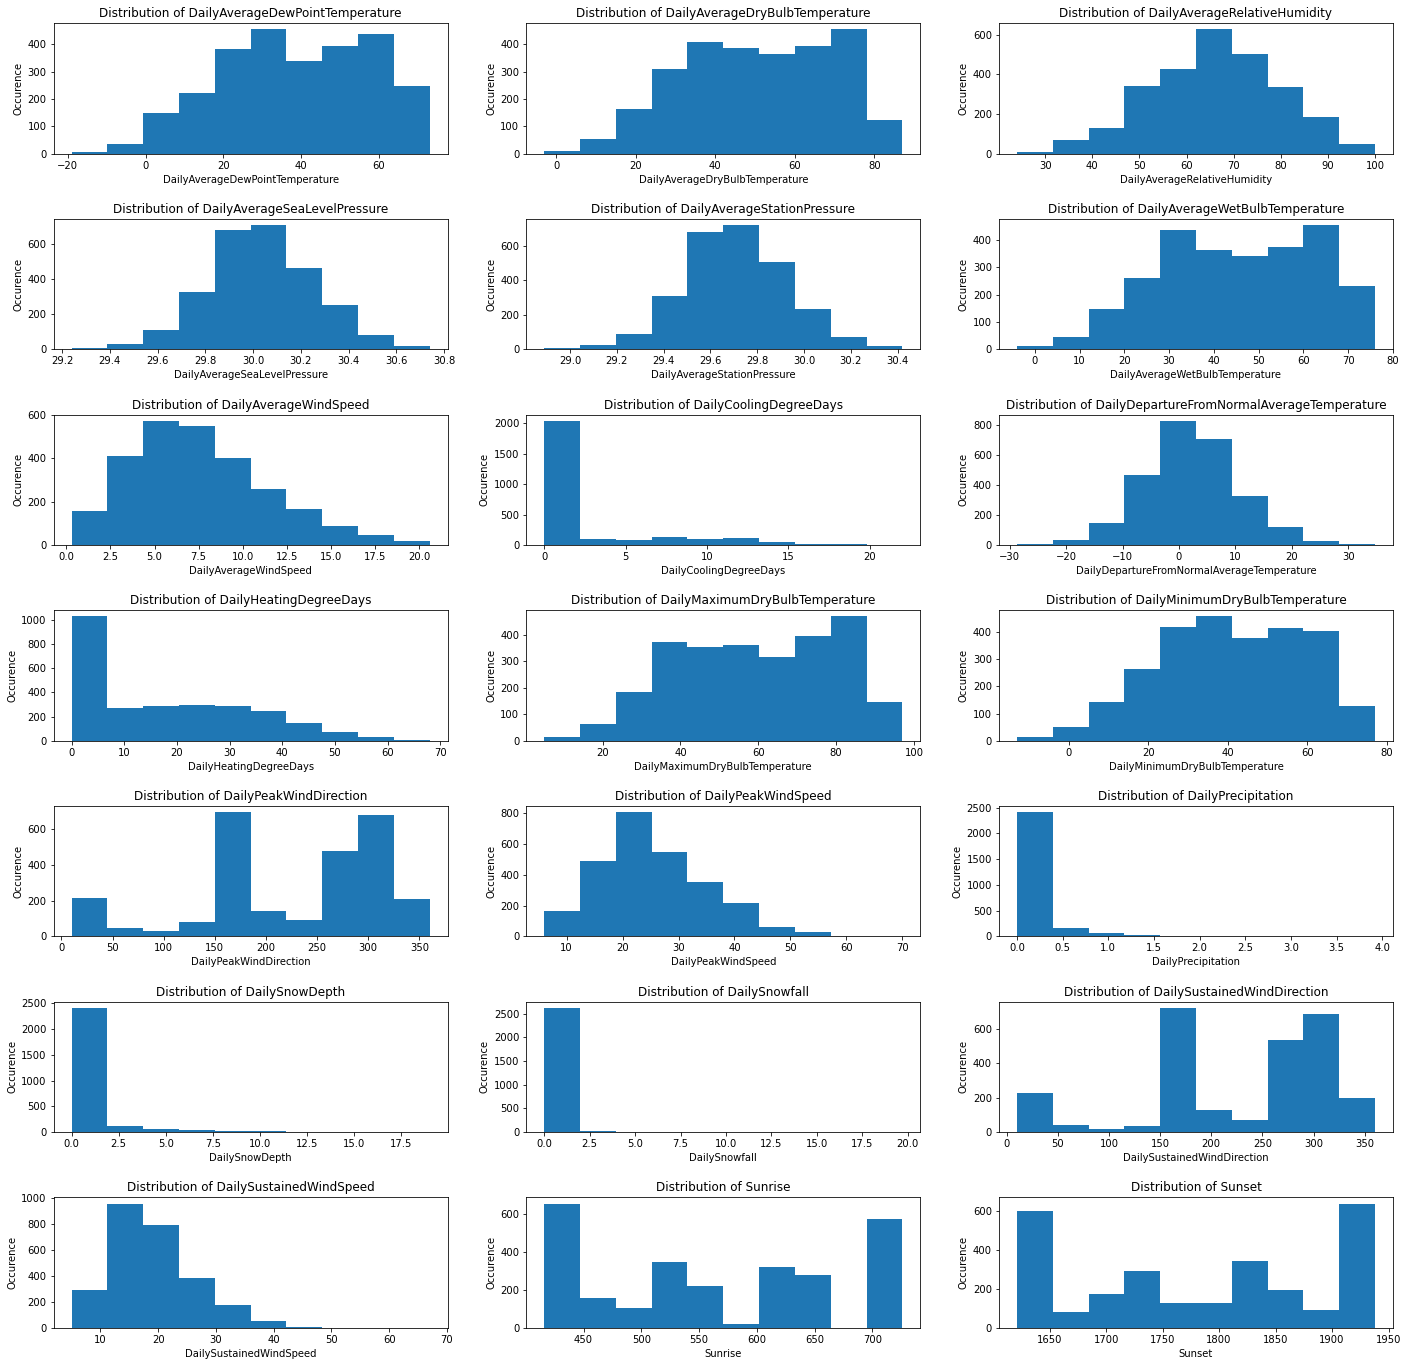

In [16]:
fig, axs = plt.subplots(7, 3, figsize=(24, 24))
for cidx, c in enumerate(climate_data.columns):
    row_idx = cidx // 3
    col_idx = cidx % 3
    ax = axs[row_idx][col_idx]
    data = climate_data[c]
    ax.hist(data)
    ax.set_title(f"Distribution of {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Occurence')
plt.subplots_adjust(hspace=0.5)
plt.show()

First of all: Let's see if there is invalid data left. In this case `invalid` isn't meant in a synthactical way (e.g. data-type), but in a semantic way: In other words: We have to ask ourselves `Does this data make sense to me?` For instance, data would be wrong if we would encounter temperatures near $0$ Kelvin since such cold temperatures do not occur on earth if we don't consider some phyiscal experiment trying to reach such temperatures. However, in this case everything looks okay, so we can proceed.

We encounter that some variables look close to the normal distribution such as DailyPeakWindSpeed, others look more like a log-normal or exponential distribution such as DailyCoolingDegreeDays. Such information can be important for the model-choice later on since some models have assumptions regarding the distributions of the input-features. If these are not met, obviously we shouldn't use them.

As a next step, let's see the correlations between the variables:

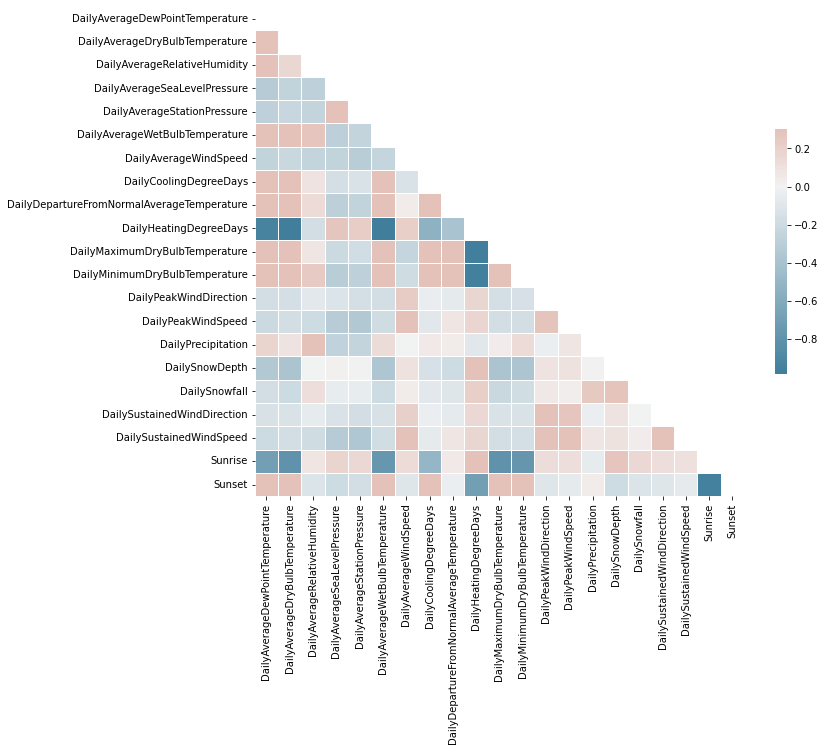

In [17]:
corr = climate_data.corr()
# since the correlation matrix is diagonal, we only need the lower triangular matrix
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [18]:
climate_data.to_csv('../data/climate-data/prepared_data.csv')

We see that our target variable is positively correlated with many of our features. However, the correlation isn't that strong (< 0.2 most of the time). Additionally, we have a few strong negative correlations with a few features. Also, some feature seem to have a very low correlation wiht out target, thus we can think about removing them from the dataset. Additionally we encounter many inter-feature correlations. This makes sense since some features represent similar things. For example the DailyMaxinimumBulbTemperature and the DailyAverageBulbTemperature are correlated because the minimum temperature has a direct influence on the average temperature. These observations will have an influence on our model choice and/or on our next steps. For instance, if we decide to use a Random Forest to solve the task, we can simply fit such a model. If we decide to use a GLM further feature engineering is probably required in order to meet the independence-assumption made by GLMs. However, note that in practice you don't have to care too much with the assumptions. Often models like GLMs still work quite well, even if there are correlated features. As a rule of thumb you can say that inter-feature correlations smaller than 0.5 are not necessarily a problem most of the time because there are tweaks to models like GLMs that can handle such problems.

Since this is not a workshop on data cleaning, we will stop with cleaning here for this dataset. Let's do the same for our classification dataset.

## Credit-Data
The second task we want to solve is a classification task: Given some information about a customer of a bank, we want to assign a credit-score to this customer. Again, let's first load the data and have a first look at it:

In [19]:
credit_data = pd.read_csv('../data/credit-data/data.csv', index_col=0)
credit_data

/home/jonas/anaconda3/envs/automl/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: DtypeWarning: Columns (26) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
ID,,,,,,,,,,,,,,,,,,,,,
0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,4,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,6,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor


In [20]:
credit_data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


In [21]:
credit_data.columns

Index(['Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

Let's have a look at the columns again: We see that there are columns which will give us no value, such as the Customer-Id, name, SSN or Id (which is probably a case-id). Also columns like Month can most likely be removed, however note that the month can indeed have a statistical influence on the credit score of people. However, we will assume that this columns won't give us much valuable information, so we'll remove it. Occupation can be removed as well since it usually highly correlated with the income. For example a CEO most likely earns more money than a mechanic. Considering the Payment_Behavior-column it's hard to say how we can translate these values into a numerical representation since there is no notiion of which behavior is better. Therefore we will exclude this column as well. The rest of the features will be included in our data.

Additionally we can encounter several problems with the data by looking at the summary provided by pandas: First, it seems that there are entries indicating that a customer has -1 bank accounts which does not make sense obviously. Additionally we see that there are values indicating a delay of -5 days. This can make sense if this column corresponds to the tracking of when a payment was done, but if we really talk about a delay then negative values don't make sense. It is unclear how we should deal with these values, so we will have a look at them more closely in the next steps.

In [22]:
uninformative_columns = ['Customer_ID', 'Month', 'Name', 'SSN', 'Occupation', 'Payment_Behaviour', 'Type_of_Loan']
credit_data.drop(columns=uninformative_columns, inplace=True)
credit_data.reset_index(drop=True, inplace=True)
credit_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.5,3.0,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,479.866228,Poor
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.5,3.0,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,496.65161,Poor
99997,25,39628.99,3359.415833,4,6,5729,2,27,6,11.5,3.0,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,516.809083,Poor
99998,25,39628.99,3359.415833,4,6,7,2,20,NaN,11.5,3.0,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,319.164979,Standard


Let's proceed by checking for null-values

In [23]:
for c in credit_data.columns:
    has_null = any(credit_data[c].isnull())
    print(f"Column {c} has null: {has_null}")

Column Age has null: False
Column Annual_Income has null: False
Column Monthly_Inhand_Salary has null: True
Column Num_Bank_Accounts has null: False
Column Num_Credit_Card has null: False
Column Interest_Rate has null: False
Column Num_of_Loan has null: False
Column Delay_from_due_date has null: False
Column Num_of_Delayed_Payment has null: True
Column Changed_Credit_Limit has null: False
Column Num_Credit_Inquiries has null: True
Column Credit_Mix has null: False
Column Outstanding_Debt has null: False
Column Credit_Utilization_Ratio has null: False
Column Credit_History_Age has null: True
Column Payment_of_Min_Amount has null: False
Column Total_EMI_per_month has null: False
Column Amount_invested_monthly has null: True
Column Monthly_Balance has null: True
Column Credit_Score has null: False


There are several columns with NaN-values, let's see how many rows we have with at least one NaN-value:

In [24]:
has_nan_row = credit_data.isnull().any(axis=1)
nan_ratio = len(has_nan_row[has_nan_row == True]) / len(has_nan_row)
print(f"{nan_ratio * 100:.2f}% have NaN")

33.45% have NaN


We see that around 1/3 of our data has at least one NaN-value in a row, let's see which columns contribute most to this:

In [25]:
for c in credit_data.columns:
    nan_ratio = credit_data[c].isnull().sum().sum() / len(credit_data)
    print(f"Column {c}: {nan_ratio * 100:.2f}% have NaN")

Column Age: 0.00% have NaN
Column Annual_Income: 0.00% have NaN
Column Monthly_Inhand_Salary: 15.00% have NaN
Column Num_Bank_Accounts: 0.00% have NaN
Column Num_Credit_Card: 0.00% have NaN
Column Interest_Rate: 0.00% have NaN
Column Num_of_Loan: 0.00% have NaN
Column Delay_from_due_date: 0.00% have NaN
Column Num_of_Delayed_Payment: 7.00% have NaN
Column Changed_Credit_Limit: 0.00% have NaN
Column Num_Credit_Inquiries: 1.97% have NaN
Column Credit_Mix: 0.00% have NaN
Column Outstanding_Debt: 0.00% have NaN
Column Credit_Utilization_Ratio: 0.00% have NaN
Column Credit_History_Age: 9.03% have NaN
Column Payment_of_Min_Amount: 0.00% have NaN
Column Total_EMI_per_month: 0.00% have NaN
Column Amount_invested_monthly: 4.48% have NaN
Column Monthly_Balance: 1.20% have NaN
Column Credit_Score: 0.00% have NaN


This reveals that the most NaN-values come from the Monthly_Inhand_Salary-column. We will again choose a simple imputation-method: Replacing all NaN-values with the median of the corresponding column. For the Credit_History_Age-column we have to perform some additional preprocessing at the same time: Converting the string provided into a float. But before doing so, let's check if there are other issues with the data.

In [26]:
for c in credit_data.columns:
    print(f"Data-type of column {c}: {credit_data[c].dtype}")

Data-type of column Age: object
Data-type of column Annual_Income: object
Data-type of column Monthly_Inhand_Salary: float64
Data-type of column Num_Bank_Accounts: int64
Data-type of column Num_Credit_Card: int64
Data-type of column Interest_Rate: int64
Data-type of column Num_of_Loan: object
Data-type of column Delay_from_due_date: int64
Data-type of column Num_of_Delayed_Payment: object
Data-type of column Changed_Credit_Limit: object
Data-type of column Num_Credit_Inquiries: float64
Data-type of column Credit_Mix: object
Data-type of column Outstanding_Debt: object
Data-type of column Credit_Utilization_Ratio: float64
Data-type of column Credit_History_Age: object
Data-type of column Payment_of_Min_Amount: object
Data-type of column Total_EMI_per_month: float64
Data-type of column Amount_invested_monthly: object
Data-type of column Monthly_Balance: object
Data-type of column Credit_Score: object


Here we see that most of the columns are of type `object`, indicating that pandas was not able to resolve all values to a certain data-type during loading, thus there must be type-mismatches in these columns. Let's check what's wrong there:

In [27]:
for c in credit_data.columns:
    if credit_data[c].dtype == 'object':
        print(f"Unique values of {c}: {credit_data[c].unique()}")

Unique values of Age: ['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique values of Annual_Income: ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique values of Num_of_Loan: ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '455' '55' '1096'
 '1474' '420' '1131' '904' '89' '1259' '527' '1241' '449' '983' '418'

Indeed, there are other issues with the data. For example we see that in some columns numerical values have an additional underscore behind or before the actual value. We will convert these numbers into proper float-values later. We further see that we still have columns containing string values, for instance `Credit_History_Age`. We will convert these columns into numerical values:

In [28]:
months_of_year = 12
credit_hist_age = []
for string in credit_data['Credit_History_Age'].values:
    if isinstance(string, float):
        credit_hist_age.append(float('nan'))
        continue
    spstring = string.split('and')
    years_str, months_str = spstring[0], spstring[1]
    years = float(years_str.split('Years')[0])
    months = float(months_str.split('Months')[0])
    frac_year = np.round(months / months_of_year, 3)
    years += frac_year
    credit_hist_age.append(years)

In [29]:
credit_data.loc[:, 'Credit_History_Age'] = credit_hist_age

In [30]:
credit_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,_,809.98,26.822620,22.083,No,49.574949,80.41529543900253,312.49408867943663,Good
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,284.62916249607184,Good
2,-500,19114.12,NaN,3,4,3,4,3,7,_,4.0,Good,809.98,28.609352,22.250,No,49.574949,81.699521264648,331.2098628537912,Good
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,Good,809.98,31.377862,22.333,No,49.574949,199.4580743910713,223.45130972736786,Good
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,Good,809.98,24.797347,22.417,No,49.574949,41.420153086217326,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.5,3.0,_,502.38,34.663572,31.500,No,35.104023,60.97133255718485,479.866228,Poor
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.5,3.0,_,502.38,40.565631,31.583,No,35.104023,54.18595028760385,496.65161,Poor
99997,25,39628.99,3359.415833,4,6,5729,2,27,6,11.5,3.0,Good,502.38,41.255522,31.667,No,35.104023,24.02847744864441,516.809083,Poor
99998,25,39628.99,3359.415833,4,6,7,2,20,NaN,11.5,3.0,Good,502.38,33.638208,31.750,No,35.104023,251.67258219721603,319.164979,Standard


No there are three remaining columns containing string-values. `Credit_Mix`, `Credit_Score` (our label) and `Payment_of_Min_Amount` which we'll encode as a binary value:

In [31]:
credit_data['Credit_Mix'].unique()

array(['_', 'Good', 'Standard', 'Bad'], dtype=object)

In [32]:
credit_mix = []
for string in credit_data['Credit_Mix'].values:
    val = None
    if string == '_':
        val = float('nan')
    elif string == 'Good':
        val = 2
    elif string == 'Standard':
        val = 1
    elif string == 'Bad':
        val = 0
    credit_mix.append(val)

In [33]:
credit_data.loc[:, 'Credit_Mix'] = credit_mix

In [34]:
credit_score = []
for string in credit_data['Credit_Score'].values:
    val = None
    if string == '_':
        val = float('nan')
    elif string == 'Good':
        val = 2
    elif string == 'Standard':
        val = 1
    elif string == 'Poor':
        val = 0
    credit_score.append(val)

In [35]:
credit_data.loc[:, 'Credit_Score'] = credit_score

In [36]:
payment_min_am = []
for string in credit_data['Payment_of_Min_Amount'].values:
    val = None
    if string == 'NM':
        val = float('nan')
    elif string == 'No':
        val = 0
    elif string == 'Yes':
        val = 1
    payment_min_am.append(val)

In [37]:
credit_data.loc[:, 'Payment_of_Min_Amount'] = payment_min_am

In [38]:
credit_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23,19114.12,1824.843333,3,4,3,4,3,7,11.27,4.0,NaN,809.98,26.822620,22.083,0.0,49.574949,80.41529543900253,312.49408867943663,2
1,23,19114.12,NaN,3,4,3,4,-1,NaN,11.27,4.0,2.0,809.98,31.944960,NaN,0.0,49.574949,118.28022162236736,284.62916249607184,2
2,-500,19114.12,NaN,3,4,3,4,3,7,_,4.0,2.0,809.98,28.609352,22.250,0.0,49.574949,81.699521264648,331.2098628537912,2
3,23,19114.12,NaN,3,4,3,4,5,4,6.27,4.0,2.0,809.98,31.377862,22.333,0.0,49.574949,199.4580743910713,223.45130972736786,2
4,23,19114.12,1824.843333,3,4,3,4,6,NaN,11.27,4.0,2.0,809.98,24.797347,22.417,0.0,49.574949,41.420153086217326,341.48923103222177,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25,39628.99,3359.415833,4,6,7,2,23,7,11.5,3.0,NaN,502.38,34.663572,31.500,0.0,35.104023,60.97133255718485,479.866228,0
99996,25,39628.99,3359.415833,4,6,7,2,18,7,11.5,3.0,NaN,502.38,40.565631,31.583,0.0,35.104023,54.18595028760385,496.65161,0
99997,25,39628.99,3359.415833,4,6,5729,2,27,6,11.5,3.0,2.0,502.38,41.255522,31.667,0.0,35.104023,24.02847744864441,516.809083,0
99998,25,39628.99,3359.415833,4,6,7,2,20,NaN,11.5,3.0,2.0,502.38,33.638208,31.750,0.0,35.104023,251.67258219721603,319.164979,1


Now all columns that still are of type `object` should have the same issue (the underscore in the numbers):

In [39]:
for c in credit_data.columns:
    if credit_data[c].dtype == 'object':
        print(f"Unique values of {c}: {credit_data[c].unique()}")

Unique values of Age: ['23' '-500' '28_' ... '4808_' '2263' '1342']
Unique values of Annual_Income: ['19114.12' '34847.84' '34847.84_' ... '20002.88' '39628.99' '39628.99_']
Unique values of Num_of_Loan: ['4' '1' '3' '967' '-100' '0' '0_' '2' '3_' '2_' '7' '5' '5_' '6' '8' '8_'
 '9' '9_' '4_' '7_' '1_' '1464' '6_' '622' '352' '472' '1017' '945' '146'
 '563' '341' '444' '720' '1485' '49' '737' '1106' '466' '728' '313' '843'
 '597_' '617' '119' '663' '640' '92_' '1019' '501' '1302' '39' '716' '848'
 '931' '1214' '186' '424' '1001' '1110' '1152' '457' '1433' '1187' '52'
 '1480' '1047' '1035' '1347_' '33' '193' '699' '329' '1451' '484' '132'
 '649' '995' '545' '684' '1135' '1094' '1204' '654' '58' '348' '614'
 '1363' '323' '1406' '1348' '430' '153' '1461' '905' '1312' '1424' '1154'
 '95' '1353' '1228' '819' '1006' '795' '359' '1209' '590' '696' '1185_'
 '1465' '911' '1181' '70' '816' '1369' '143' '1416' '455' '55' '1096'
 '1474' '420' '1131' '904' '89' '1259' '527' '1241' '449' '983' '418'

In [40]:
for c in credit_data.columns:
    if credit_data[c].dtype == 'object':
        float_values = []
        for val in credit_data[c].values:
            if isinstance(val, float):
                float_values.append(val)
            elif val == '_':
                float_values.append(float('nan'))
            elif '_' in val:
                fval = np.round(float(val.replace('_', '')), 3)
                float_values.append(fval)
            else:
                fval = np.round(float(val), 3)
                float_values.append(fval)
        credit_data.loc[:, c] = float_values
credit_data

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,NaN,809.98,26.822620,22.083,0.0,49.574949,80.415,312.494000,2
1,23.0,19114.12,NaN,3,4,3,4.0,-1,NaN,11.27,4.0,2.0,809.98,31.944960,NaN,0.0,49.574949,118.280,284.629000,2
2,-500.0,19114.12,NaN,3,4,3,4.0,3,7.0,NaN,4.0,2.0,809.98,28.609352,22.250,0.0,49.574949,81.700,331.210000,2
3,23.0,19114.12,NaN,3,4,3,4.0,5,4.0,6.27,4.0,2.0,809.98,31.377862,22.333,0.0,49.574949,199.458,223.451000,2
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,NaN,11.27,4.0,2.0,809.98,24.797347,22.417,0.0,49.574949,41.420,341.489000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,NaN,502.38,34.663572,31.500,0.0,35.104023,60.971,479.866228,0
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,NaN,502.38,40.565631,31.583,0.0,35.104023,54.186,496.651610,0
99997,25.0,39628.99,3359.415833,4,6,5729,2.0,27,6.0,11.50,3.0,2.0,502.38,41.255522,31.667,0.0,35.104023,24.028,516.809083,0
99998,25.0,39628.99,3359.415833,4,6,7,2.0,20,NaN,11.50,3.0,2.0,502.38,33.638208,31.750,0.0,35.104023,251.673,319.164979,1


In [41]:
for c in credit_data.columns:
    if credit_data[c].dtype == 'object':
        print(f"Unique values of {c}: {credit_data[c].unique()}")

We see: No object-columns anymore! Great, now let's deal with the nan-values!

In [42]:
mask = (credit_data.isnull()).any(axis=1).to_numpy().astype(bool)
credit_data.iloc[mask]

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,23.0,19114.12,1824.843333,3,4,3,4.0,3,7.0,11.27,4.0,NaN,809.98,26.822620,22.083,0.0,49.574949,80.415,312.494000,2
1,23.0,19114.12,NaN,3,4,3,4.0,-1,NaN,11.27,4.0,2.0,809.98,31.944960,NaN,0.0,49.574949,118.280,284.629000,2
2,-500.0,19114.12,NaN,3,4,3,4.0,3,7.0,NaN,4.0,2.0,809.98,28.609352,22.250,0.0,49.574949,81.700,331.210000,2
3,23.0,19114.12,NaN,3,4,3,4.0,5,4.0,6.27,4.0,2.0,809.98,31.377862,22.333,0.0,49.574949,199.458,223.451000,2
4,23.0,19114.12,1824.843333,3,4,3,4.0,6,NaN,11.27,4.0,2.0,809.98,24.797347,22.417,0.0,49.574949,41.420,341.489000,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99993,25.0,39628.99,3359.415833,4,6,7,2.0,23,NaN,11.50,3.0,2.0,502.38,29.135447,31.333,0.0,58638.000000,180.733,400.104466,1
99994,25.0,39628.99,3359.415833,4,6,7,2.0,20,6.0,9.50,3.0,NaN,502.38,39.323569,31.417,0.0,35.104023,140.581,410.256158,0
99995,25.0,39628.99,3359.415833,4,6,7,2.0,23,7.0,11.50,3.0,NaN,502.38,34.663572,31.500,0.0,35.104023,60.971,479.866228,0
99996,25.0,39628.99,3359.415833,4,6,7,2.0,18,7.0,11.50,3.0,NaN,502.38,40.565631,31.583,0.0,35.104023,54.186,496.651610,0


We see that we have in more than 50% of our records at least one NaN-value. This is much more than before we did the data-type conversion. Let's see which columns contribute the most to this:

In [43]:
for c in credit_data.columns:
    nan_ratio = credit_data[c].isnull().sum().sum() / len(credit_data)
    print(f"Column {c}: {nan_ratio * 100:.2f}% have NaN")

Column Age: 0.00% have NaN
Column Annual_Income: 0.00% have NaN
Column Monthly_Inhand_Salary: 15.00% have NaN
Column Num_Bank_Accounts: 0.00% have NaN
Column Num_Credit_Card: 0.00% have NaN
Column Interest_Rate: 0.00% have NaN
Column Num_of_Loan: 0.00% have NaN
Column Delay_from_due_date: 0.00% have NaN
Column Num_of_Delayed_Payment: 7.00% have NaN
Column Changed_Credit_Limit: 2.09% have NaN
Column Num_Credit_Inquiries: 1.97% have NaN
Column Credit_Mix: 20.20% have NaN
Column Outstanding_Debt: 0.00% have NaN
Column Credit_Utilization_Ratio: 0.00% have NaN
Column Credit_History_Age: 9.03% have NaN
Column Payment_of_Min_Amount: 12.01% have NaN
Column Total_EMI_per_month: 0.00% have NaN
Column Amount_invested_monthly: 4.48% have NaN
Column Monthly_Balance: 1.20% have NaN
Column Credit_Score: 0.00% have NaN


We obtain that `Credit_Mix` and `Payment_of_Min_Amount` have 20% and 12% NaN-values each, this was not before we performed the data-type conversion. Since these are pretty much samples we would have to impute/remove, we will impute the other columns first (by their median) and then check for correlations in the EDA. The reason is that we might be able to drop these two columns if we encounter a high correlation with other features.

In [44]:
exclude = ['Payment_of_Min_Amount', 'Credit_Mix']
for c in credit_data.columns:
    nan_ratio = credit_data[c].isnull().sum().sum() / len(credit_data)
    if nan_ratio > 0 and c not in exclude:
        non_nan_values = credit_data[~credit_data[c].isnull()][c]
        median = np.median(non_nan_values)
        credit_data.loc[credit_data[c].isnull(), c] = median

In [45]:
for c in credit_data.columns:
    nan_ratio = credit_data[c].isnull().sum().sum() / len(credit_data)
    print(f"Column {c}: {nan_ratio * 100:.2f}% have NaN")

Column Age: 0.00% have NaN
Column Annual_Income: 0.00% have NaN
Column Monthly_Inhand_Salary: 0.00% have NaN
Column Num_Bank_Accounts: 0.00% have NaN
Column Num_Credit_Card: 0.00% have NaN
Column Interest_Rate: 0.00% have NaN
Column Num_of_Loan: 0.00% have NaN
Column Delay_from_due_date: 0.00% have NaN
Column Num_of_Delayed_Payment: 0.00% have NaN
Column Changed_Credit_Limit: 0.00% have NaN
Column Num_Credit_Inquiries: 0.00% have NaN
Column Credit_Mix: 20.20% have NaN
Column Outstanding_Debt: 0.00% have NaN
Column Credit_Utilization_Ratio: 0.00% have NaN
Column Credit_History_Age: 0.00% have NaN
Column Payment_of_Min_Amount: 12.01% have NaN
Column Total_EMI_per_month: 0.00% have NaN
Column Amount_invested_monthly: 0.00% have NaN
Column Monthly_Balance: 0.00% have NaN
Column Credit_Score: 0.00% have NaN


## EDA

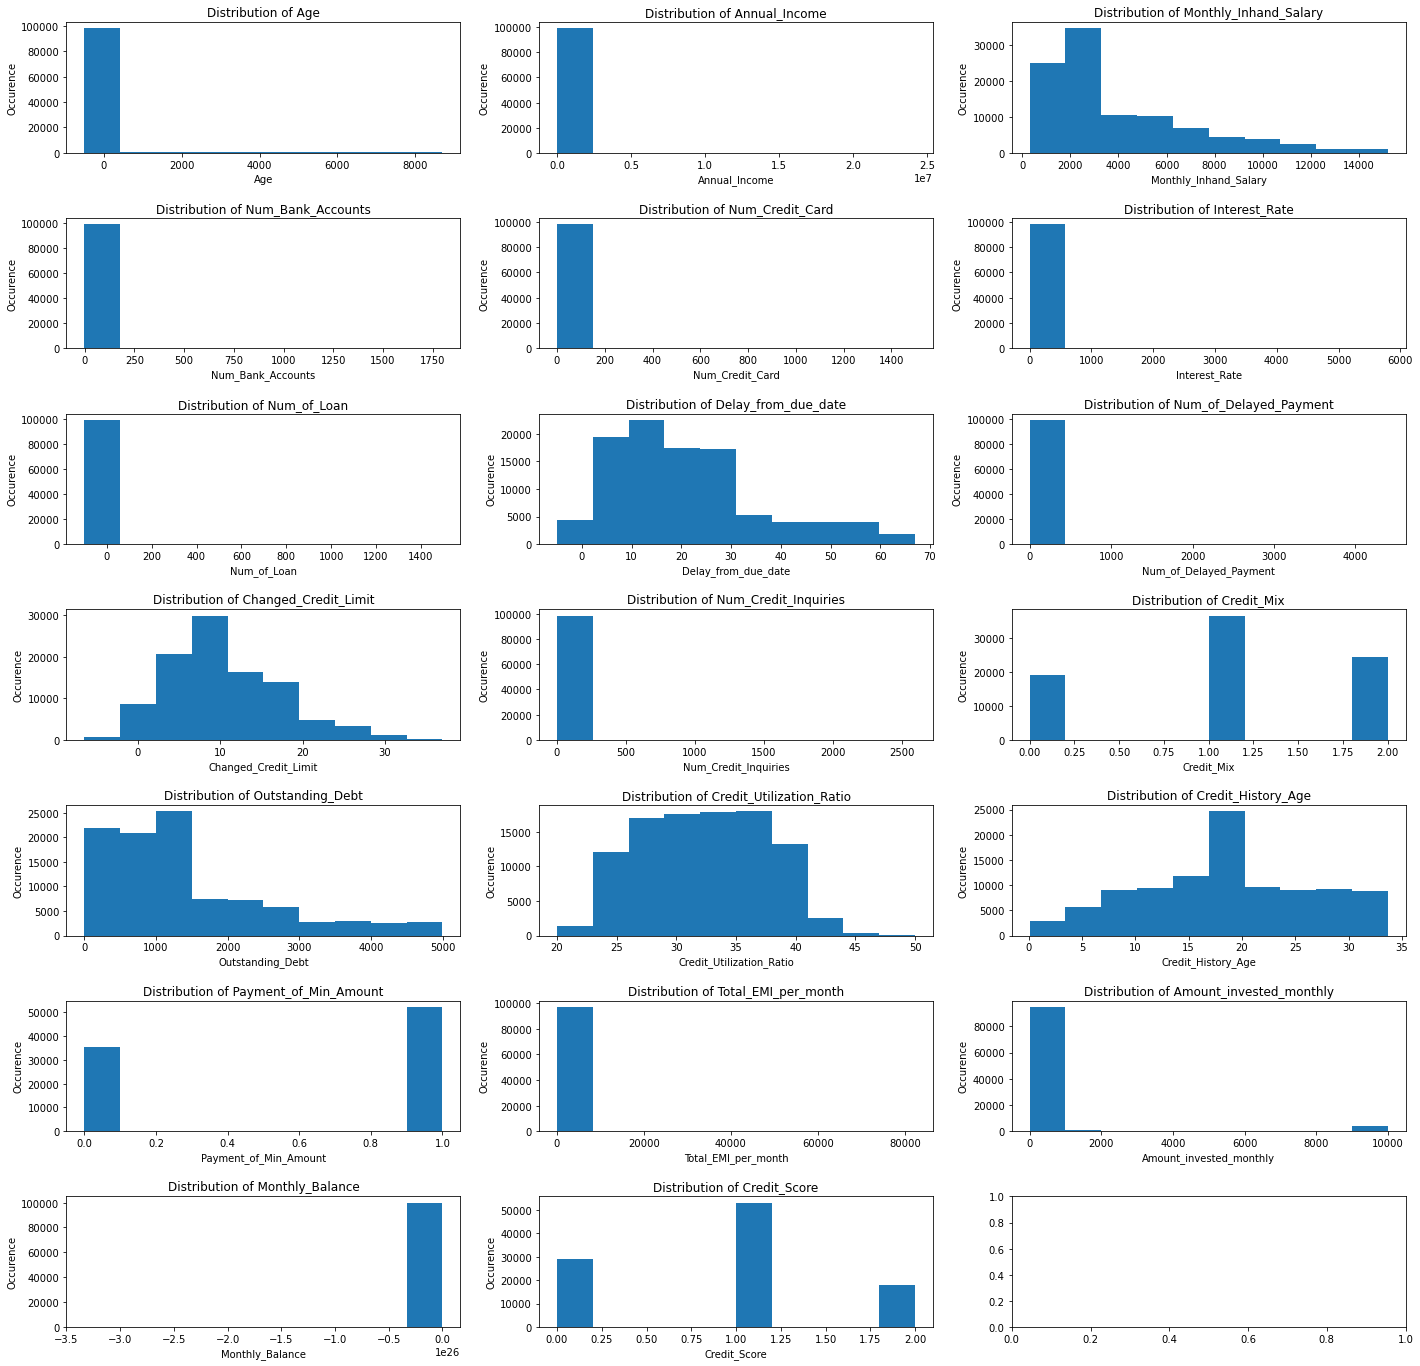

In [46]:
fig, axs = plt.subplots(7, 3, figsize=(24, 24))
for cidx, c in enumerate(credit_data.columns):
    row_idx = cidx // 3
    col_idx = cidx % 3
    ax = axs[row_idx][col_idx]
    data = credit_data[c]
    ax.hist(data)
    ax.set_title(f"Distribution of {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Occurence')
plt.subplots_adjust(hspace=0.5)
plt.show()

We'll try to identify outliers using IsolationForests. These models are working well to identify outliers in high-dimensional data, thus let's try and see the output:

In [47]:
X = credit_data.iloc[credit_data.isnull().any(axis=1).to_numpy().astype(bool) == False]
iforest = IsolationForest(n_estimators=20)
iforest.fit(X.to_numpy())

IsolationForest(n_estimators=20)

In [48]:
inds = iforest.predict(X.to_numpy())
idx = np.argwhere(inds == -1).reshape(1, -1)[0]
credit_data_no_outliers = credit_data.iloc[idx, :]

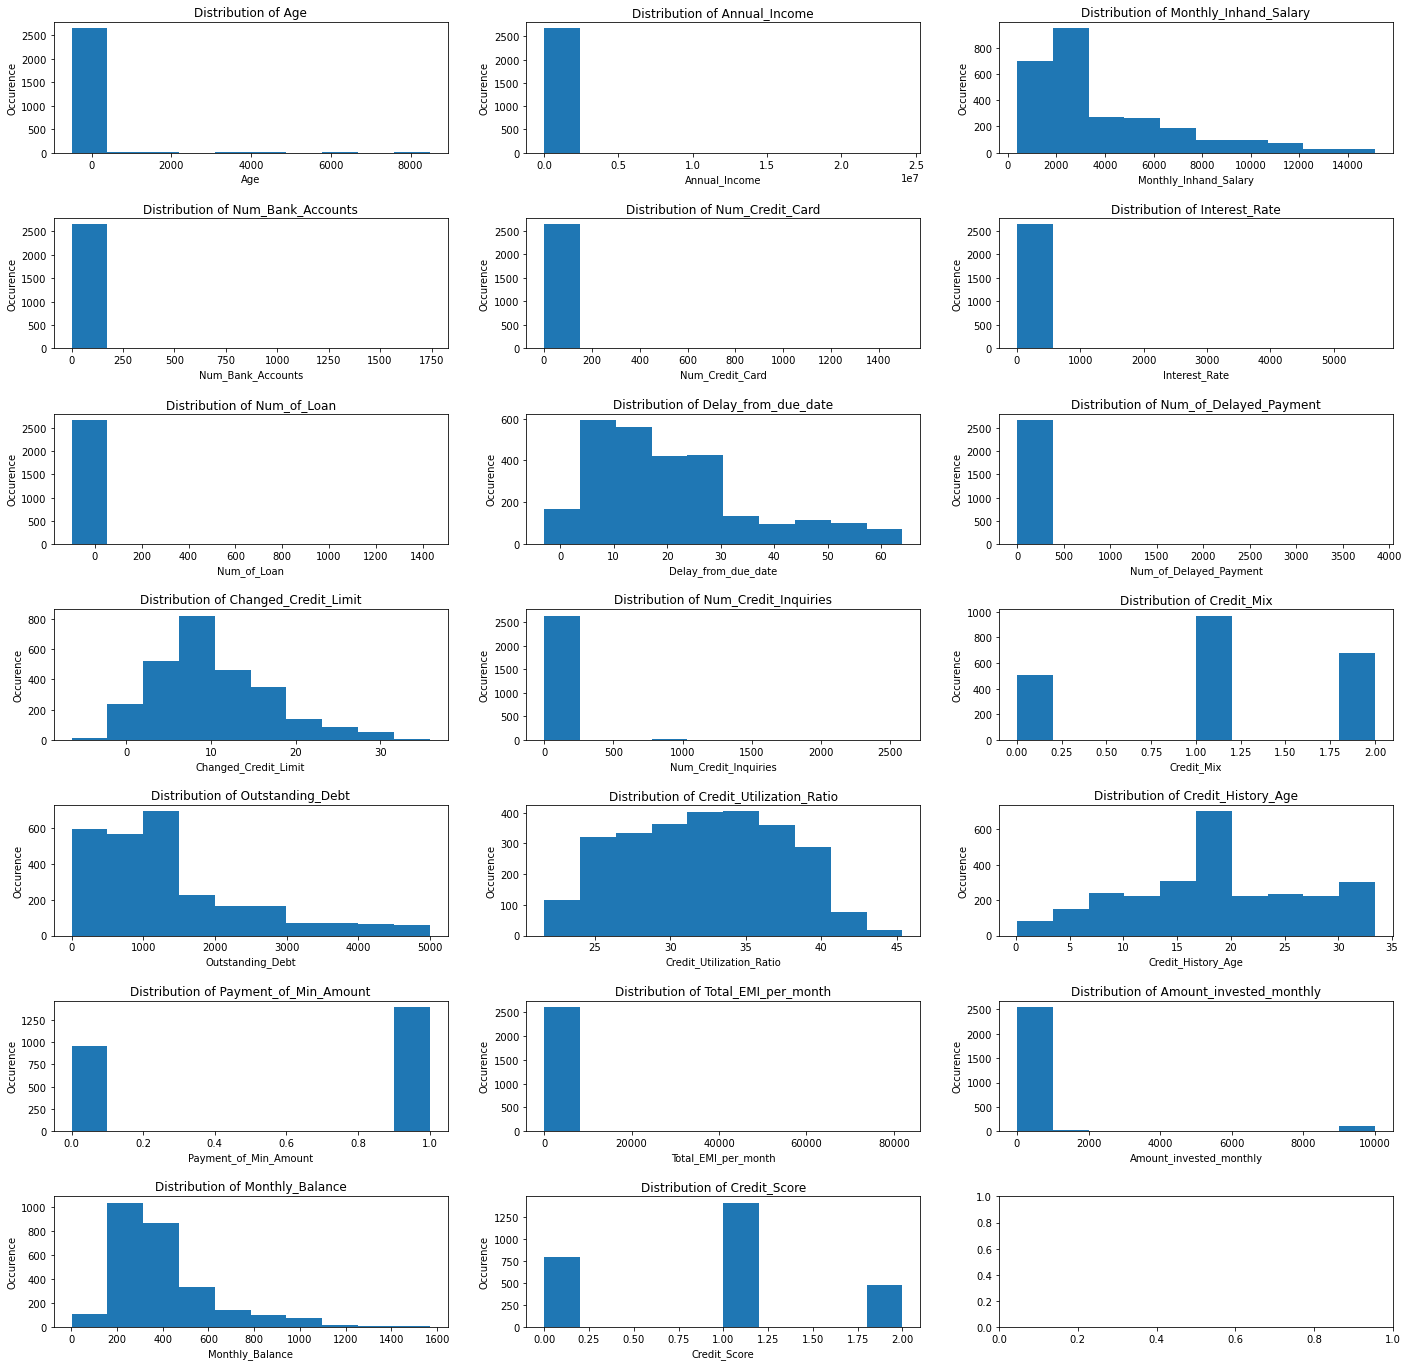

In [49]:
fig, axs = plt.subplots(7, 3, figsize=(24, 24))
for cidx, c in enumerate(credit_data_no_outliers.columns):
    row_idx = cidx // 3
    col_idx = cidx % 3
    ax = axs[row_idx][col_idx]
    data = credit_data_no_outliers[c]
    ax.hist(data)
    ax.set_title(f"Distribution of {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Occurence')
plt.subplots_adjust(hspace=0.5)
plt.show()

We see that the IF has excluded several datapoints from our dataset. However, there are still points that do not make sense (semantically), thus we will remove them manually:

In [50]:
# remove age > 130 and age < 0
credit_data_no_outliers = credit_data_no_outliers[(credit_data_no_outliers['Age'] <= 130) & (credit_data_no_outliers['Age'] > 0)]

# remove bank-accounts > 100
credit_data_no_outliers = credit_data_no_outliers[credit_data_no_outliers['Num_Bank_Accounts'] <= 100]

# remove num-credit cards > 100
credit_data_no_outliers = credit_data_no_outliers[credit_data_no_outliers['Num_Credit_Card'] <= 100]

# remove num-loan > 100
credit_data_no_outliers = credit_data_no_outliers[credit_data_no_outliers['Num_of_Loan'] <= 100]

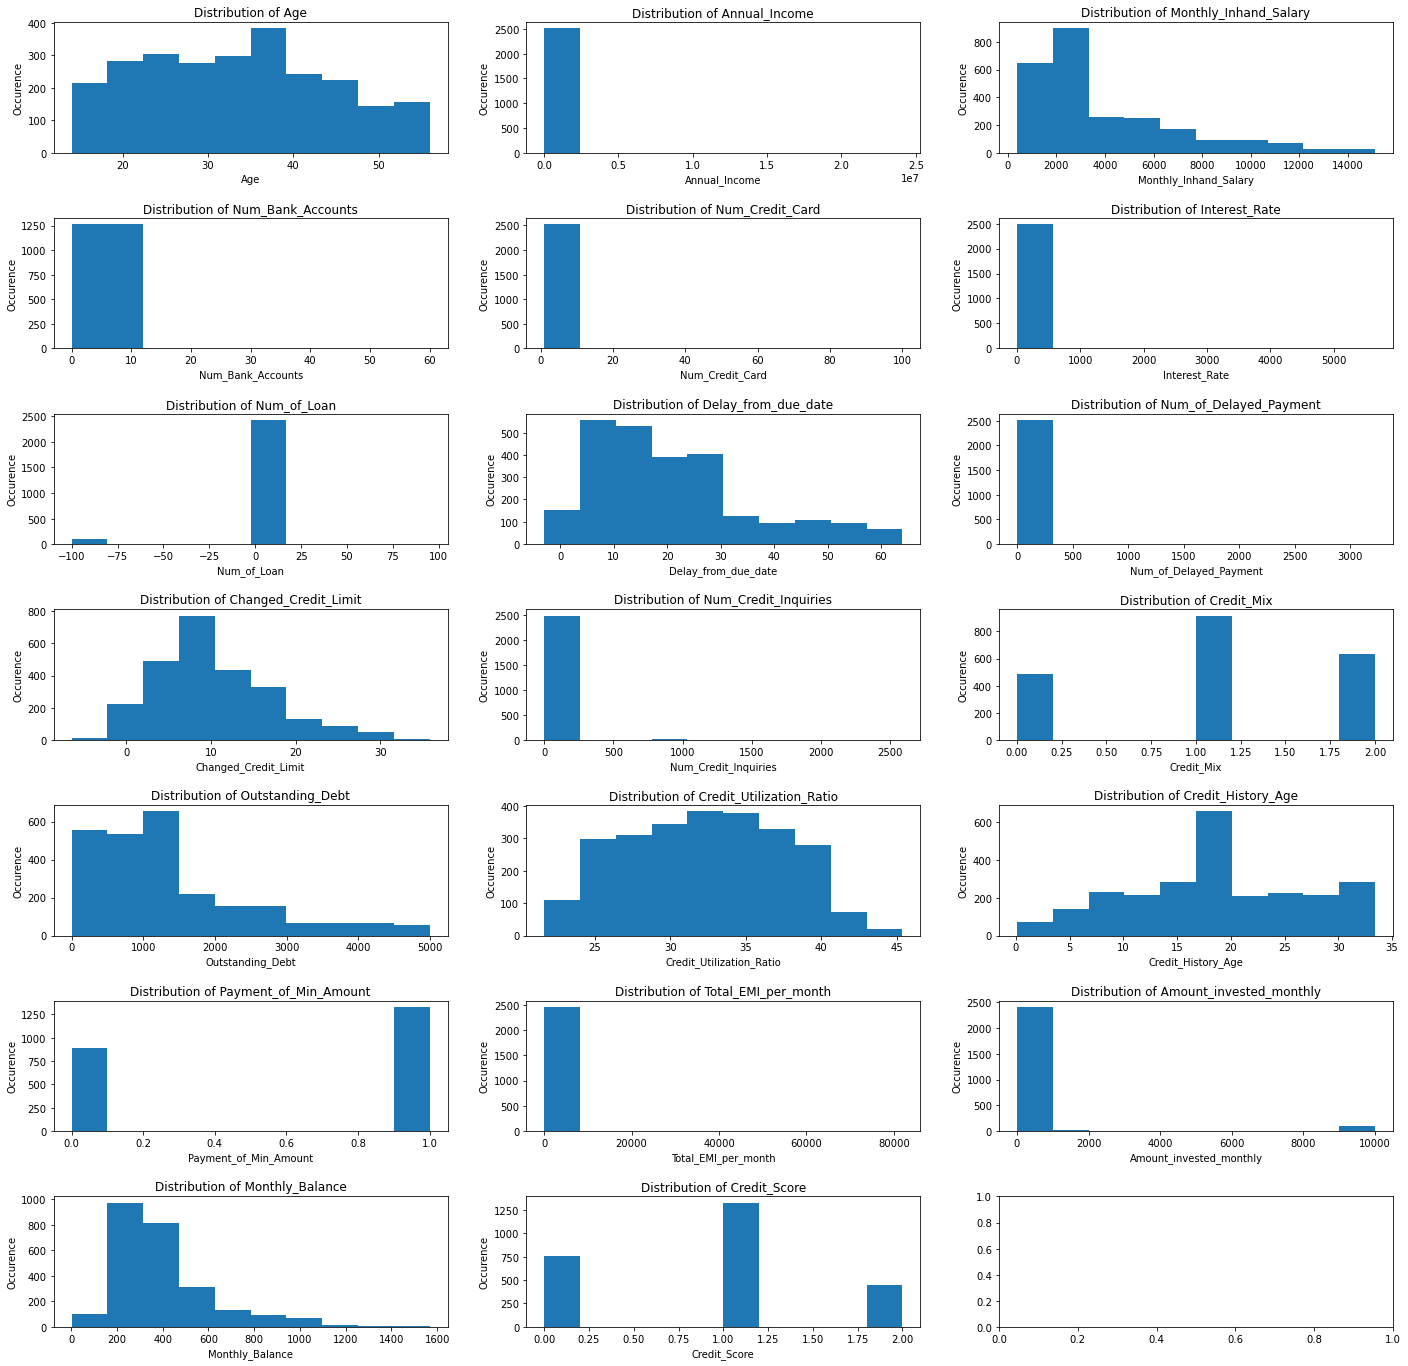

In [51]:
fig, axs = plt.subplots(7, 3, figsize=(24, 24))
for cidx, c in enumerate(credit_data_no_outliers.columns):
    row_idx = cidx // 3
    col_idx = cidx % 3
    ax = axs[row_idx][col_idx]
    data = credit_data_no_outliers[c]
    ax.hist(data)
    ax.set_title(f"Distribution of {c}")
    ax.set_xlabel(c)
    ax.set_ylabel('Occurence')
plt.subplots_adjust(hspace=0.5)
plt.show()

We find several flaws with the data:
1. some age-values are unrealistic. We will remove them
2. There are outliers in many columns such as Annual_Income, Number_Of_Credit_Cards etc. We will remove them
3. Monthly Balance seems to be negative for the majoriy of customers

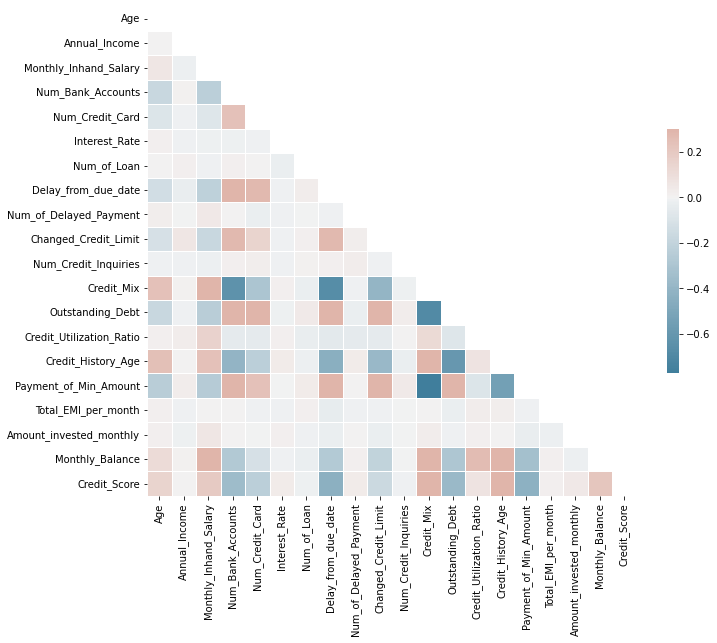

In [52]:
corr = credit_data_no_outliers.corr()
# since the correlation matrix is diagonal, we only need the lower triangular matrix
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

We see that `Credit_Mix` is strongly correlated with `Outstanding_Debt` and `Payment_of_Min_Amount` is correlated with several other variables. Thus we will remove both from our dataset to get rid of NaN-values.

In [53]:
credit_data_no_outliers.drop(columns=['Credit_Mix', 'Payment_of_Min_Amount'], inplace=True)

In [139]:
credit_data_no_outliers.to_csv('../data/credit-data/prepared_data.csv')